In [1]:
# import everything you need
from src import *
import numpy as np
import matplotlib.pyplot as plt

# set plot properties
plt.rcParams.update({'font.size': 25,
                     'font.family': 'Candara',
                     'text.usetex': True
                     })

# notebook code reloading
%load_ext autoreload
%autoreload 2

# Settings

In [ ]:
# for the lattice
Lx, Ly = 2,2
lat = hilbert.lattice(Lx, Ly)

# for the network
alpha = 1/4

# for ground state optimization
eta = 0.01

# for dynamics
steps = 1500
endtime = 1.5
wellbehaved = lambda t: 0.5 # a nice quench
breakdown = lambda t: -2. # an unstable quench

# links to process
links = [(0,2)]

# **Ground state**

This is how you can get the ground state.

In [ ]:
# declare
gs = groundstate.descent(lat, alpha, eta)

# run
gs.optimize(miniter=1000)

iteration 100 ... energy:  -1.9999967862102797
iteration 200 ... energy:  -1.9999992248684826
iteration 300 ... energy:  -1.9999998615428842
iteration 400 ... energy:  -1.9999999818150072
iteration 500 ... energy:  -1.9999999989736086
iteration 600 ... energy:  -1.9999999999953975
iteration 700 ... energy:  -2.0
iteration 800 ... energy:  -2.0
iteration 900 ... energy:  -2.0
iteration 1000 ... energy:  -2.0


Let's use my ground state instead.

In [2]:
# load it from the provided file
initial_state = np.array(np.loadtxt('../initial_state.txt'), dtype = complex)

# NOTE: if you want to use the ground state from the descent class instead, uncomment the following line:
#initial_state = gs.states[-1].copy()
initial_state

array([-1.09483164e-16+0.j,  3.10519709e-01+0.j, -3.06082621e-01+0.j,
       -3.94322551e-01+0.j,  3.10519709e-01+0.j])

# <span style='color: lightblue'> **Calculations** </span>

We're calculating ED and NQS dynamics for two quenches, $\Delta = 0.5$ (well behaved), and $\Delta = -2$ (breakdown), for different combinations of formulations and integrators. The time step of the implicit integration is deliberately reduced, to highliht the offset from exact solutions for different formulations.

## ED

In [6]:
# make ED breakdown
ed_m2 = exact.ED(lat, steps, endtime, perturbator=breakdown)
ed_m2.run()

# make ED D = 0.5
ed_05 = exact.ED(lat, steps, endtime, perturbator=wellbehaved)
ed_05.run()

## NQS $\Delta = -2$

In [ ]:
# declare explicit runs

exp_reg_m2 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             steps, endtime, perturbator=breakdown,
                             formulation='regularization', regulator = 1e-5)
exp_dia_m2 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             steps, endtime, perturbator=breakdown,
                             formulation='diagonalization')
exp_geo_m2 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             steps, endtime, perturbator=breakdown,
                             formulation='geometric')

# declare implicit runs

imp_reg_m2 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             int(steps/2), endtime, perturbator=breakdown,
                             formulation='regularization', regulator = 1e-5, # this regulator doesn't break down
                             integrator='implicit_midpoint')

imp_dia_m2 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             int(steps/2), endtime, perturbator=breakdown,
                             formulation='diagonalization',
                             integrator='implicit_midpoint')

imp_geo_m2 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             int(steps/2), endtime, perturbator=breakdown,
                             formulation='geometric',
                             integrator='implicit_midpoint')

In [8]:
# run them all
print("\nRunning explicit...\n")
exp_reg_m2.run()
exp_dia_m2.run()
exp_geo_m2.run()
print("\nRunning implicit...\n")
imp_reg_m2.run()
imp_dia_m2.run()
imp_geo_m2.run()

# analyze correlations
print("\nProcessing explicit correlations...\n")
exp_reg_m2.process_links(links)
exp_dia_m2.process_links(links)
exp_geo_m2.process_links(links)
print("\nProcessing implicit correlations...\n")
imp_reg_m2.process_links(links)
imp_dia_m2.process_links(links)
imp_geo_m2.process_links(links)


Running explicit...

running simmulation...


100%|██████████| 1500/1500 [00:10<00:00, 148.80it/s]


running simmulation...


100%|██████████| 1500/1500 [00:19<00:00, 78.65it/s] 


running simmulation...


100%|██████████| 1500/1500 [00:17<00:00, 83.62it/s]



Running implicit...

running simmulation...


100%|██████████| 750/750 [00:25<00:00, 29.03it/s]


running simmulation...


100%|██████████| 750/750 [00:31<00:00, 23.48it/s]


running simmulation...


100%|██████████| 750/750 [00:26<00:00, 28.08it/s]



Processing explicit correlations...

calculating correlations at links: [(0, 2)]


100%|██████████| 1501/1501 [00:03<00:00, 493.73it/s]


calculating correlations at links: [(0, 2)]


100%|██████████| 1501/1501 [00:03<00:00, 497.92it/s]


calculating correlations at links: [(0, 2)]


100%|██████████| 1501/1501 [00:01<00:00, 964.82it/s] 



Processing implicit correlations...

calculating correlations at links: [(0, 2)]


100%|██████████| 751/751 [00:00<00:00, 1084.78it/s]


calculating correlations at links: [(0, 2)]


100%|██████████| 751/751 [00:00<00:00, 1076.74it/s]


calculating correlations at links: [(0, 2)]


100%|██████████| 751/751 [00:01<00:00, 689.70it/s] 


## NQS $\Delta = 0.5$

In [ ]:
# declare explicit runs

exp_reg_05 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             steps, endtime, perturbator =lambda t: 0.5,
                             formulation='regularization', regulator = 1e-5)
exp_dia_05 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             steps, endtime, perturbator = lambda t: 0.5,
                             formulation='diagonalization')
exp_geo_05 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             steps, endtime, perturbator = lambda t: 0.5,
                             formulation='geometric')

# declare implicit runs

imp_reg_05 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             int(steps/2), endtime, perturbator = lambda t: 0.5,
                             formulation='regularization', regulator = 1e-5,
                             integrator='implicit_midpoint')

imp_dia_05 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             int(steps/2), endtime, perturbator = lambda t: 0.5,
                             formulation='diagonalization',
                             integrator='implicit_midpoint')

imp_geo_05 = dynamics.evolution(lat, alpha, initial_state.copy(), 
                             int(steps/2), endtime, perturbator = lambda t: 0.5,
                             formulation='geometric',
                             integrator='implicit_midpoint')

In [10]:
# run them all
print("\nRunning explicit...\n")
exp_reg_05.run()
exp_dia_05.run()
exp_geo_05.run()
print("\nRunning implicit...\n")
imp_reg_05.run()
imp_dia_05.run()
imp_geo_05.run()

# analyze them all
print("\nProcessing explicit...\n")
exp_reg_05.process_links(links)
exp_dia_05.process_links(links)
exp_geo_05.process_links(links)
print("\nProcessing implicit...\n")
imp_reg_05.process_links(links)
imp_dia_05.process_links(links)
imp_geo_05.process_links(links)


Running explicit...

running simmulation...


100%|██████████| 1500/1500 [00:10<00:00, 139.96it/s]


running simmulation...


100%|██████████| 1500/1500 [00:18<00:00, 81.59it/s] 


running simmulation...


100%|██████████| 1500/1500 [00:16<00:00, 89.38it/s] 



Running implicit...

running simmulation...


100%|██████████| 750/750 [00:16<00:00, 45.81it/s]


running simmulation...


100%|██████████| 750/750 [00:20<00:00, 37.14it/s]


running simmulation...


100%|██████████| 750/750 [00:19<00:00, 38.86it/s]



Processing explicit...

calculating correlations at links: [(0, 2)]


100%|██████████| 1501/1501 [00:01<00:00, 1054.15it/s]


calculating correlations at links: [(0, 2)]


100%|██████████| 1501/1501 [00:02<00:00, 562.00it/s]


calculating correlations at links: [(0, 2)]


100%|██████████| 1501/1501 [00:02<00:00, 555.24it/s]



Processing implicit...

calculating correlations at links: [(0, 2)]


100%|██████████| 751/751 [00:00<00:00, 1047.02it/s]


calculating correlations at links: [(0, 2)]


100%|██████████| 751/751 [00:00<00:00, 1071.71it/s]


calculating correlations at links: [(0, 2)]


100%|██████████| 751/751 [00:01<00:00, 730.09it/s] 


# <span style='color: lightgreen'> **Plots** </span>

## (a,b): $\Delta = 0.5$

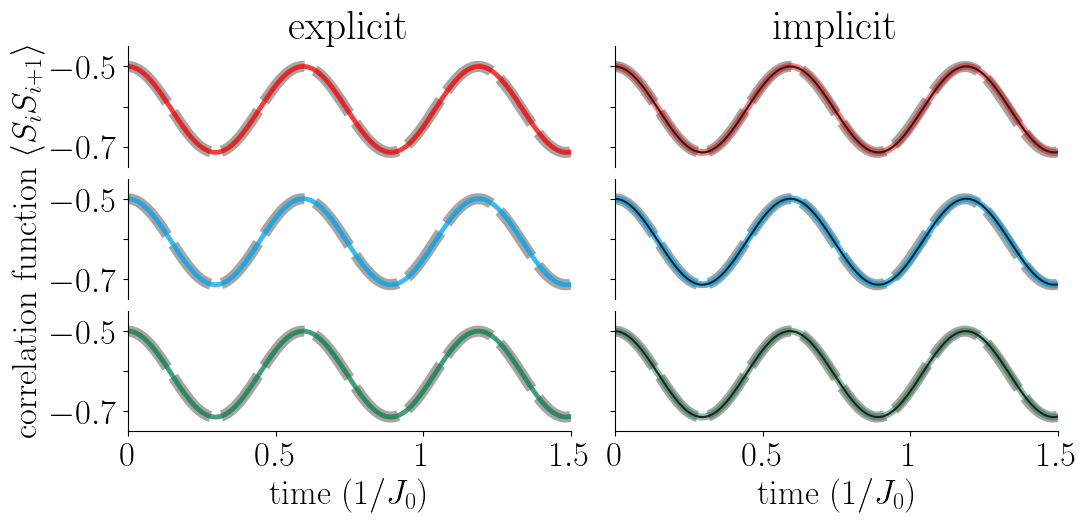

In [16]:
# plot settings
fig, axes = plt.subplots(3,2, figsize=(12, 5), sharex=True)
plt.subplots_adjust(hspace=0.1, wspace = 0.1)

# y sharing
for row in axes:
    for ax in row[1:]:
        ax.sharey(row[0])
        ax.tick_params(labelleft=False)

# visual settings
# order: regularization, diagonalization, geometric, implicit
# from coolors.co: Off Red, Picton Blue, Sea Green, Licorice, either Silver: '#C1BDB3' or Timberwolf: '#D4D2D5'
cols = ['#F40000', '#00A6ED', '#09814A', '#291F1E', '#D4D2D5']
opacities = [0.75, 0.75, 0.75, 1.]

# ED references
ref = ed_05.observables['correlations'][(0,2)]
ref_halftime = ref[::2]

# explicit regularization
axes[0,0].plot(ed_05.times, ref, lw = 8, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[0,0].plot(exp_reg_05.times, exp_reg_05.correlations[(0,2)], lw = 3.5, alpha = opacities[0], color = cols[0])
axes[0,0].fill_between(ed_05.times, ref, exp_reg_05.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)

# explicit diagonalization
axes[1,0].plot(ed_05.times, ref, lw = 8, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[1,0].plot(exp_dia_05.times, exp_dia_05.correlations[(0,2)], lw = 3.5, alpha = opacities[1], color = cols[1])
axes[1,0].fill_between(ed_05.times, ref, exp_dia_05.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)

# explicit geometric
axes[2,0].plot(ed_05.times, ref, lw = 8, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[2,0].plot(exp_geo_05.times, exp_geo_05.correlations[(0,2)], lw = 3.5, alpha = opacities[2], color = cols[2])
axes[2,0].fill_between(ed_05.times, ref, exp_geo_05.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)

# implicit regularization
axes[0,1].plot(imp_reg_05.times, ref_halftime, lw = 8, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[0,1].plot(imp_reg_05.times, imp_reg_05.correlations[(0,2)], lw = 5, alpha = 0.5, color = cols[0]) # glow
axes[0,1].plot(imp_reg_05.times, imp_reg_05.correlations[(0,2)], lw = 1.5, alpha = opacities[3], color = cols[-2])
axes[0,1].fill_between(imp_reg_05.times, ref_halftime, imp_reg_05.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)

# implicit diagonalization
axes[1,1].plot(imp_dia_05.times, ref_halftime, lw = 8, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[1,1].plot(imp_dia_05.times, imp_dia_05.correlations[(0,2)], lw = 5, alpha = 0.75, color = cols[1]) # glow
axes[1,1].plot(imp_dia_05.times, imp_dia_05.correlations[(0,2)], lw = 1.5, alpha = opacities[3], color = cols[3])
axes[1,1].fill_between(imp_dia_05.times, ref_halftime, imp_dia_05.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)

# implicit geometric
axes[2,1].plot(imp_geo_05.times, ref_halftime, lw = 8, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[2,1].plot(imp_geo_05.times, imp_geo_05.correlations[(0,2)], lw = 5, alpha = 0.5, color = cols[2]) # glow
axes[2,1].plot(imp_geo_05.times, imp_geo_05.correlations[(0,2)], lw = 1.5, alpha = opacities[3], color = cols[3])
axes[2,1].fill_between(imp_geo_05.times, ref_halftime, imp_geo_05.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)


# plot labels
axes[2,0].set_xlabel("time $(1/J_0)$")
axes[2,1].set_xlabel("time $(1/J_0)$")
axes[1,0].set_ylabel(r"correlation function $\left< S_i S_{i+1} \right>$")

# plot titles
axes[0,0].set_title("explicit")
axes[0,1].set_title("implicit")

for (i,ax) in enumerate(axes.flatten()):
    # axis ranges
    ax.set_xlim([0,1.5])
    ax.set_ylim([-0.75, -0.45])

    # ticks
    ax.set_yticks([-0.7, -0.6, -0.5])
    ax.set_yticklabels(["$-0.7$", "", "$-0.5$"])
    ax.set_xticks([0, 0.5, 1, 1.5])
    ax.set_xticklabels(["$0$", "$0.5$", "$1$", "$1.5$"])

    # spines (graph borders)
    if i != 4 and i != 5:
        ax.spines[['right', 'top', 'bottom']].set_visible(False)
        ax.tick_params(axis='x', length=0)
    else:
        ax.spines[['right', 'top']].set_visible(False)

plt.savefig("delta_05.svg", format="svg", bbox_inches = "tight")

## (c,d): $\Delta = -2$

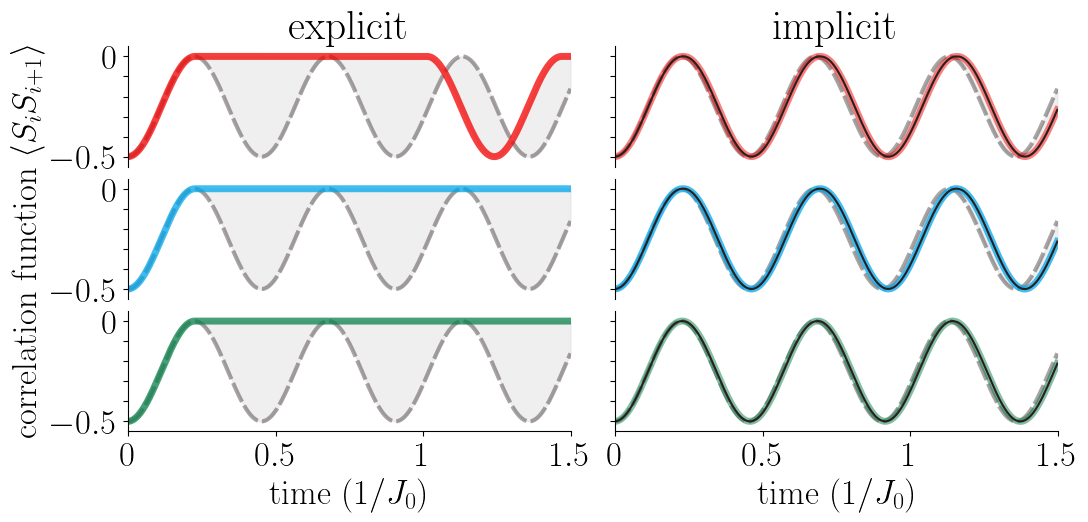

In [ ]:
# plot settings
fig, axes = plt.subplots(3,2, figsize=(12, 5), sharex=True)
plt.subplots_adjust(hspace=0.1, wspace = 0.1)

# y sharing
for row in axes:
    for ax in row[1:]:
        ax.sharey(row[0])
        ax.tick_params(labelleft=False)

# visual settings
# order: regularization, diagonalization, geometric, implicit
# from coolors.co: Off Red, Picton Blue, Sea Green, Licorice, either Silver: '#C1BDB3' or Timberwolf: '#D4D2D5'
cols = ['#F40000', '#00A6ED', '#09814A', '#291F1E', '#D4D2D5']
opacities = [0.75, 0.75, 0.75, 1.]

# ED references
ref = ed_m2.observables['correlations'][(0,2)]
ref_halftime = ref[::2]

# explicit regularization
axes[0,0].plot(ed_m2.times, ref, lw = 3, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[0,0].plot(exp_reg_m2.times, exp_reg_m2.correlations[(0,2)], lw = 5, alpha = opacities[0], color = cols[0])
axes[0,0].fill_between(ed_m2.times, ref, exp_reg_m2.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)

# explicit diagonalization
axes[1,0].plot(ed_m2.times, ref, lw = 3, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[1,0].plot(exp_dia_m2.times, exp_dia_m2.correlations[(0,2)], lw = 5, alpha = opacities[1], color = cols[1])
axes[1,0].fill_between(ed_m2.times, ref, exp_dia_m2.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)

# explicit geometric
axes[2,0].plot(ed_m2.times, ref, lw = 3, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[2,0].plot(exp_geo_m2.times, exp_geo_m2.correlations[(0,2)], lw = 5, alpha = opacities[2], color = cols[2])
axes[2,0].fill_between(ed_m2.times, ref, exp_geo_m2.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)

# implicit regularization
axes[0,1].plot(imp_reg_m2.times, ref_halftime, lw = 3, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[0,1].plot(imp_reg_m2.times, imp_reg_m2.correlations[(0,2)], lw = 5, alpha = 0.5, color = cols[0]) # glow
axes[0,1].plot(imp_reg_m2.times, imp_reg_m2.correlations[(0,2)], lw = 1.5, alpha = opacities[3], color = cols[-2])
axes[0,1].fill_between(imp_reg_m2.times, ref_halftime, imp_reg_m2.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)

# implicit diagonalization
axes[1,1].plot(imp_dia_m2.times, ref_halftime, lw = 3, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[1,1].plot(imp_dia_m2.times, imp_dia_m2.correlations[(0,2)], lw = 5, alpha = 0.75, color = cols[1]) # glow
axes[1,1].plot(imp_dia_m2.times, imp_dia_m2.correlations[(0,2)], lw = 1.5, alpha = opacities[3], color = cols[-2])
axes[1,1].fill_between(imp_dia_m2.times, ref_halftime, imp_dia_m2.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)

# implicit geometric
axes[2,1].plot(imp_geo_m2.times, ref_halftime, lw = 3, ls = (0,(5,1)), color = cols[-2], alpha = 0.4)
axes[2,1].plot(imp_geo_m2.times, imp_geo_m2.correlations[(0,2)], lw = 5, alpha = 0.5, color = cols[2]) # glow
axes[2,1].plot(imp_geo_m2.times, imp_geo_m2.correlations[(0,2)], lw = 1.5, alpha = opacities[3], color = cols[-2])
axes[2,1].fill_between(imp_geo_m2.times, ref_halftime, imp_geo_m2.correlations[(0,2)], interpolate=True, color=cols[-1], alpha=0.35)


# plot labels
axes[2,0].set_xlabel("time $(1/J_0)$")
axes[2,1].set_xlabel("time $(1/J_0)$")
axes[1,0].set_ylabel(r"correlation function $\left< S_i S_{i+1} \right>$")

# plot titles
axes[0,0].set_title("explicit")
axes[0,1].set_title("implicit")

for (i,ax) in enumerate(axes.flatten()):
    # axis ranges
    ax.set_xlim([0,1.5])
    ax.set_ylim([-0.55, 0.05])

    # ticks
    ax.set_yticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0])
    ax.set_yticklabels(["$-0.5$", "", "", "", "", "$0$"])
    ax.set_xticks([0, 0.5, 1, 1.5])
    ax.set_xticklabels(["$0$", "$0.5$", "$1$", "$1.5$"])
    #ax.tick_params(axis='y', colors='your_color')

    # spines (graph borders)
    if i != 4 and i != 5:
        ax.spines[['right', 'top', 'bottom']].set_visible(False)
        ax.tick_params(axis='x', length=0)
    else:
        ax.spines[['right', 'top']].set_visible(False)

plt.savefig("delta_-2.svg", format="svg", bbox_inches = "tight")

# <span style='color: pink'> **Saving** </span>

In [25]:
# times array, same for all data
times = ed_m2.times
halftimes = imp_geo_m2.times

# set header
head = "time, ED spin correlation, NQS regularization spin correlation, NQS diagonalization spin correlation, NQS geometric spin correlation"

## $\Delta = 0.5$

In [27]:
# explicit
data = np.c_[times, ed_05.observables['correlations'][(0,2)], exp_reg_05.correlations[(0,2)], exp_dia_05.correlations[(0,2)] , exp_geo_05.correlations[(0,2)] ]

np.savetxt("data/a_explicit_delta_0.5.txt", data, header = head, delimiter=", ")

In [28]:
# implicit
data = np.c_[halftimes, ed_m2.observables['correlations'][(0,2)][::2], imp_reg_05.correlations[(0,2)], imp_dia_05.correlations[(0,2)] , imp_geo_05.correlations[(0,2)] ]

np.savetxt("data/b_implicit_delta_0.5.txt", data, header = head, delimiter=", ")

## $\Delta = -2$

In [29]:
# explicit
data = np.c_[times, ed_m2.observables['correlations'][(0,2)], exp_reg_m2.correlations[(0,2)], exp_dia_m2.correlations[(0,2)] , exp_geo_m2.correlations[(0,2)] ]

np.savetxt("data/c_explicit_delta_-2.txt", data, header = head, delimiter=", ")

In [30]:
# implicit
data = np.c_[halftimes, ed_m2.observables['correlations'][(0,2)][::2], imp_reg_m2.correlations[(0,2)], imp_dia_m2.correlations[(0,2)] , imp_geo_m2.correlations[(0,2)] ]

np.savetxt("data/d_implicit_delta_-2.txt", data, header = head, delimiter=", ")